# E10 프로젝트 - 스티커 적용하기(얼굴에)
---
1. 자기만의 카메라앱 기능 구현을 완수하였다.
    
원본에 스티커 사진이 정상적으로 합성되었다.    
    
2. 스티커 이미지를 정확한 원본 위치에 반영하였다.
    
        
정확한 좌표계산을 통해 고양이 수염의 위치가 원본 얼굴에 잘 어울리게 출력되었다.
    
       
3. 카메라 스티커앱을 다양한 원본이미지에 적용했을 때의 문제점을 체계적으로 분석하였다.    
    
얼굴각도, 이미지 밝기, 촬영거리 등 다양한 변수에 따른 영향도를 보고서에 체계적으로 분석하였다.

## step1. 이미지 찾기 - moustache

In [22]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

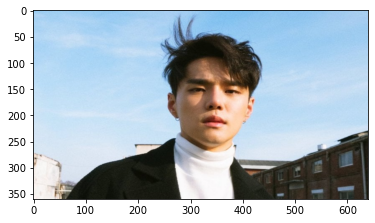

In [65]:
image_path = os.getenv("HOME")+"/aiffel/e/e10_camera_sticker/images/dean.jpg"
img_bgr = cv2.imread(image_path)
img_bgr = cv2.resize(img_bgr, (640, 360))
img_show = img_bgr.copy()  # outout img 별도보관
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

(512, 512, 3)
(100, 100, 3)
[49 62 99]


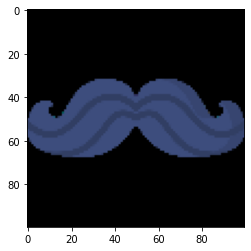

In [24]:
# sticker image - moustache
sticker_path = os.getenv("HOME")+"/aiffel/e/e10_camera_sticker/images/moustache.png"
img_sticker = cv2.imread(sticker_path)
print(img_sticker.shape)
img_sticker = cv2.resize(img_sticker, (100, 100))


print(img_sticker.shape)
print(img_sticker[50][50])
plt.imshow(img_sticker)

## step2. 얼굴 검출 & 랜드마크 검출하기

In [25]:
import dlib
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)

얼굴 bounding box 찾기

rectangles[[(282, 110) (411, 239)]]


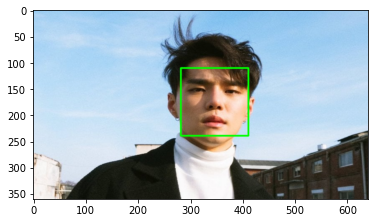

In [26]:
print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [27]:
# landmark 모델 불러오기
import os
model_path = os.getenv("HOME")+"/aiffel/e/e10_camera_sticker/models/shape_predictor_68_face_landmarks.dat"
landmark_predictor = dlib.shape_predictor(model_path)

In [28]:
# landmark_predictor - RGB image와 dlib.rectangle을 입력 받아 dlib.full_object_detection을 반환
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))
print(len(list_points))
print(list_landmarks)

68
68
[[(270, 161), (272, 179), (275, 196), (279, 213), (285, 228), (297, 239), (313, 248), (330, 253), (347, 254), (364, 251), (377, 244), (390, 235), (399, 222), (404, 207), (408, 192), (411, 177), (414, 161), (288, 140), (300, 132), (314, 131), (329, 132), (342, 137), (358, 136), (371, 134), (384, 135), (395, 138), (403, 146), (349, 149), (349, 157), (349, 165), (349, 173), (335, 187), (341, 188), (348, 189), (354, 189), (360, 189), (302, 153), (310, 150), (319, 150), (327, 154), (319, 155), (310, 155), (367, 156), (375, 153), (383, 154), (390, 158), (383, 160), (374, 159), (321, 213), (332, 205), (342, 200), (348, 202), (354, 202), (362, 208), (370, 216), (361, 221), (352, 223), (346, 223), (339, 222), (330, 219), (326, 213), (342, 209), (348, 210), (354, 210), (366, 216), (353, 214), (346, 214), (340, 213)]]


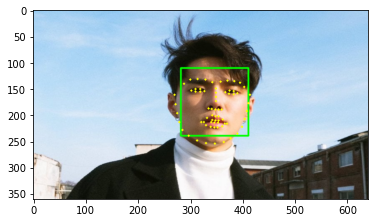

In [29]:
# landmark출력하기
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## step3. 스티커 적용 위치 확인하기

In [30]:
# 스티커 위치 확인하기
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[33]) # nose bottom index : 33
    x = landmark[33][0]
    y = landmark[33][1] + dlib_rect.width()//8
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(348, 189)
(x,y) : (348,205)
(w,h) : (130,130)


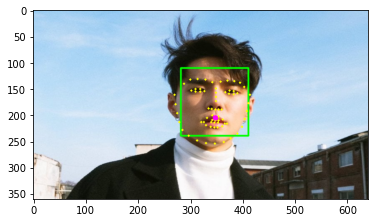

In [31]:
# 인중 위치 자주색 점으로 표시
img_show_rgb = cv2.circle(img_show, (x, y), 5, (255, 0, 255), -1)
plt.imshow(cv2.cvtColor(img_show_rgb, cv2.COLOR_BGR2RGB))
plt.show()

## step4. 스티커 적용

(130, 130, 3)


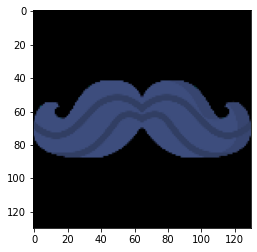

In [32]:
# 준비된 스티커 이미지 읽어 적용
import os
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)
plt.imshow(img_sticker)

In [33]:
# 원본이미지에 스티커 이미지 추가하여  `x`, `y`좌표 조정
# 이미지 시작점은 TOP LEFT좌표이다!
refined_x = x - w//2  # left
refined_y = y - h//2     # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))


# (x,y) : (284,-48)
# -> y축 값이(황관 윗부분)음수가 되었으므로 처리해준다
# opencv데이터는 ndarray데이터 사용 X, 음수 예외처리하기

(x,y) : (283,140)


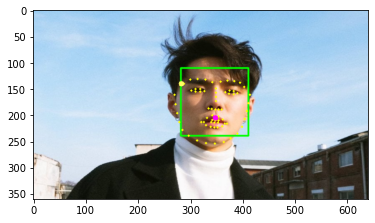

In [34]:
# sticker img 시작 위치 노란 점으로 표시
img_show_rgb = cv2.circle(img_show, (refined_x, refined_y), 5, (100, 500, 255), -1)
plt.imshow(cv2.cvtColor(img_show_rgb, cv2.COLOR_BGR2RGB))
plt.show()

In [35]:
# 원본 이미지 범위 벗어난 스티커 부분 제거
# -y 크기만큼 스티커 crop
# img_sticker = img_sticker[-refined_y:]
print (img_sticker.shape)

(130, 130, 3)


In [36]:
refined_y
img_sticker.shape[0]

130

In [37]:
# top의 y좌표는 원본 이미지의 경계값으로 수정__
refined_y = refined_y
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (283,140)


(130, 130, 3)
(130, 130, 3)
283 140


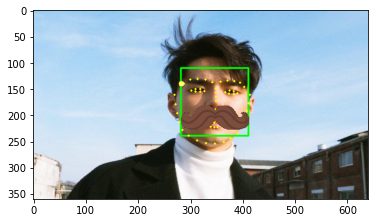

In [57]:
# sticker area : original img에서 스티커 적용할 위치를 crop한 부분
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

print(sticker_area.shape)
print(img_sticker.shape)
print(refined_x, refined_y)


img_show[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)

# 결과 이미지 출력
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

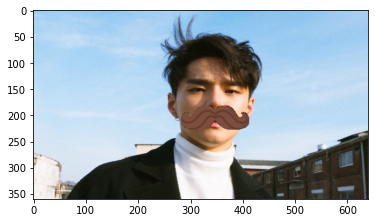

In [74]:
# 바운딩박스, landmark 제거
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

정상적으로 콧수염을 씌운 이미지가 출력되었다

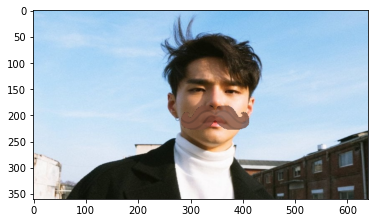

In [91]:
img_back = img_rgb
plt.imshow(img_back)
dst = cv2.addWeighted(img_back, 0.25, cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB), 0.75, 0)
plt.imshow(dst)
#plt.show()

알파 적용 완료    
+ resize한 수염 이미지를 검정색으로 채운 빈 이미지에 넣은 뒤 합치고 싶었으나 실패...

## step5. 문제점 찾아보기
---
1. 다양한 각도 사진에서 스티커 반복 적용하기
2. 문제점 기록하기
    - 얼굴 각도에 따라 스티커가 어떻게 변해야 하는지
    - 멀리서/누워서 착용하면 왜 안되는지
    - 실행속도가 중요한지
    - 스티커앱 만들 때 정확도가 얼마나 중요한지
    

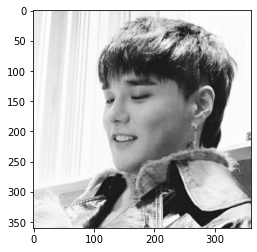

In [92]:
# 새로운 사진 불러오기
image_path = os.getenv("HOME")+"/aiffel/e/e10_camera_sticker/images/deanstagram.jpg"

img_bgr = cv2.imread(image_path)
img_bgr = cv2.resize(img_bgr, (360, 360))
img_show = img_bgr.copy()  # outout img 별도보관
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [93]:
import dlib
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)

rectangles[[(81, 98) (236, 253)]]


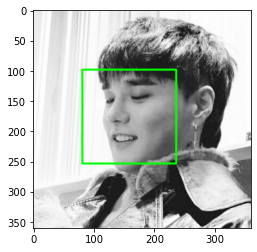

In [94]:
print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [95]:
# landmark_predictor - RGB image와 dlib.rectangle을 입력 받아 dlib.full_object_detection을 반환
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))
print(len(list_points))
print(list_landmarks)

68
68
[[(131, 153), (127, 163), (127, 176), (130, 190), (133, 204), (136, 217), (138, 235), (140, 252), (150, 259), (168, 258), (190, 250), (212, 238), (232, 224), (248, 207), (256, 186), (259, 162), (260, 139), (120, 128), (118, 125), (119, 125), (123, 125), (128, 128), (151, 124), (163, 117), (177, 115), (192, 118), (206, 123), (138, 146), (134, 156), (128, 166), (123, 176), (124, 186), (128, 189), (133, 191), (141, 189), (149, 187), (125, 152), (126, 149), (132, 148), (138, 150), (133, 153), (127, 154), (163, 147), (169, 143), (178, 143), (188, 144), (179, 148), (170, 149), (129, 213), (128, 205), (131, 203), (136, 203), (142, 202), (157, 204), (173, 210), (160, 224), (146, 228), (139, 229), (133, 228), (130, 222), (132, 213), (132, 208), (137, 208), (143, 208), (169, 211), (144, 219), (137, 219), (133, 218)]]


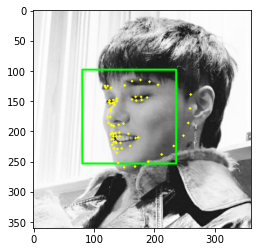

In [96]:
# landmark출력하기
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [97]:
# 스티커 위치 확인하기
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[33]) # nose bottom index : 33
    x = landmark[33][0]
    y = landmark[33][1] + dlib_rect.width()//8
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(133, 191)
(x,y) : (133,210)
(w,h) : (156,156)


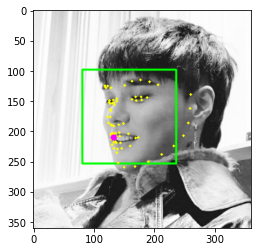

In [98]:
# 인중 위치 자주색 점으로 표시
img_show_rgb = cv2.circle(img_show, (x, y), 5, (255, 0, 255), -1)
plt.imshow(cv2.cvtColor(img_show_rgb, cv2.COLOR_BGR2RGB))
plt.show()

In [99]:
# 원본이미지에 스티커 이미지 추가하여  `x`, `y`좌표 조정
# 이미지 시작점은 TOP LEFT좌표이다!
refined_x = x - w//2  # left
refined_y = y - h//2     # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))


# (x,y) : (284,-48)
# -> y축 값이(황관 윗부분)음수가 되었으므로 처리해준다
# opencv데이터는 ndarray데이터 사용 X, 음수 예외처리하기

(x,y) : (55,132)


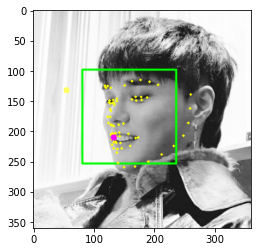

In [100]:
# sticker img 시작 위치 노란 점으로 표시
img_show_rgb = cv2.circle(img_show, (refined_x, refined_y), 5, (100, 500, 255), -1)
plt.imshow(cv2.cvtColor(img_show_rgb, cv2.COLOR_BGR2RGB))
plt.show()

(130, 130, 3)
(130, 130, 3)
55 132


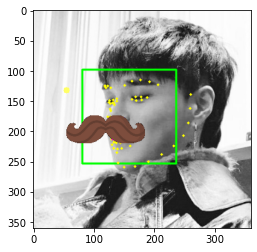

In [101]:
# sticker area : original img에서 스티커 적용할 위치를 crop한 부분
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

print(sticker_area.shape)
print(img_sticker.shape)
print(refined_x, refined_y)


img_show[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)

# 결과 이미지 출력
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

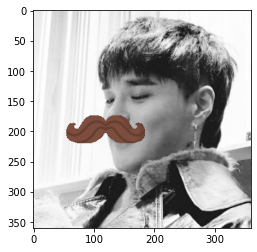

In [102]:
# 바운딩박스, landmark 제거
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()